In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.npz')

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
y_train.shape

(60000,)

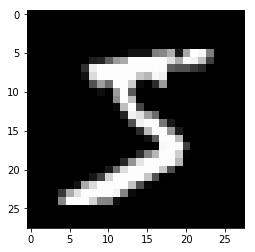

In [8]:
plt.imshow(X_train[0],cmap='gray')

In [9]:
X_train[0].shape

(28, 28)

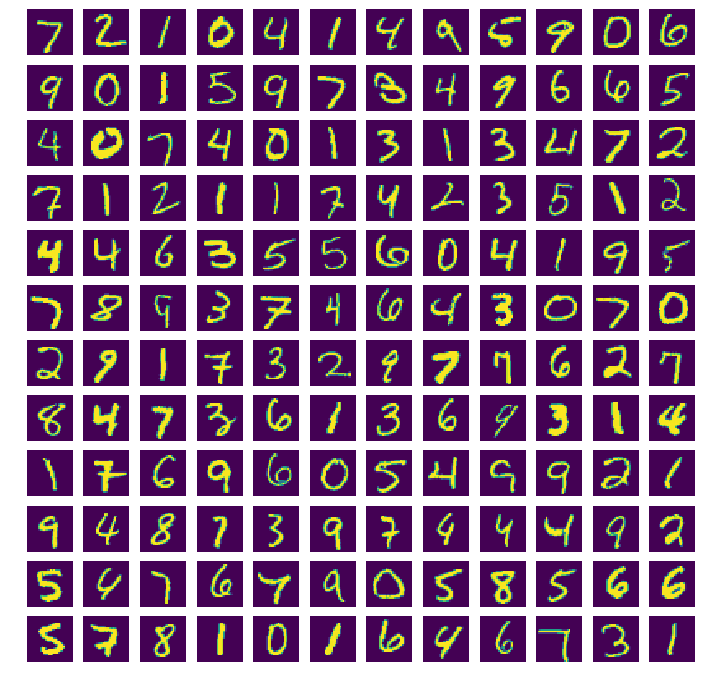

In [22]:
fig,axes=plt.subplots(12,12,figsize=(12,12))
axes=axes.ravel()
for i in range(0,12*12):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')
#plt.subplots_adjust(hspace=0.4)   

In [23]:
## Shaping the data in tensor
X_train_tensor=X_train.reshape(-1,28,28,1)
X_test_tensor=X_test.reshape(-1,28,28,1)

In [24]:
X_train_tensor.shape

(60000, 28, 28, 1)

In [32]:
from keras.utils.np_utils import to_categorical

In [33]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Activation,MaxPool2D
from keras.optimizers import rmsprop

In [35]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [37]:
model.fit(x=X_train_tensor,y=y_train_cat,epochs=20,verbose=1,validation_split=0.3)


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 29s 685us/step - loss: 0.9861 - accuracy: 0.9344 - val_loss: 0.1194 - val_accuracy: 0.9706
Epoch 2/20
42000/42000 [==============================] - 27s 638us/step - loss: 0.0743 - accuracy: 0.9801 - val_loss: 0.1044 - val_accuracy: 0.9759
Epoch 3/20
42000/42000 [==============================] - 30s 703us/step - loss: 0.0511 - accuracy: 0.9866 - val_loss: 0.1147 - val_accuracy: 0.9769
Epoch 4/20
42000/42000 [==============================] - 28s 655us/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.1406 - val_accuracy: 0.9775
Epoch 5/20
42000/42000 [==============================] - 28s 656us/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.1422 - val_accuracy: 0.9803
Epoch 6/20
42000/42000 [==============================] - 28s 658us/step - loss: 0.0231 - accuracy: 0.9942 - val_loss: 0.1567 - val_accuracy: 0.9822
Epoch 7/20
42000/42000 [==============================]

In [38]:
y_pred=model.predict_classes(X_test_tensor)

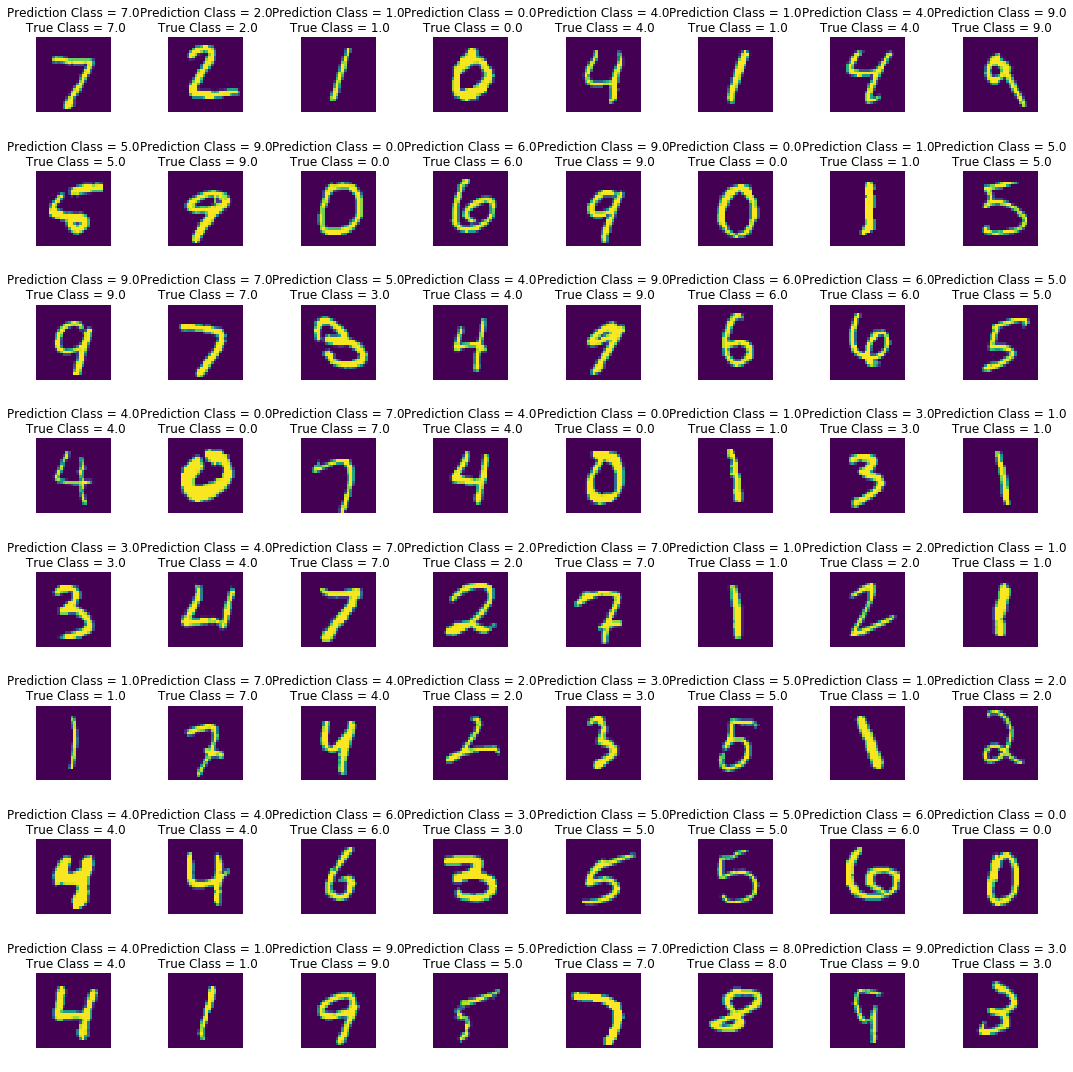

In [44]:
fig,axes=plt.subplots(8,8,figsize=(15,15))

axes=axes.ravel()

for i in range(0,8*8):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i],y_test[i]))
    axes[i].axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

In [45]:
result=pd.DataFrame({'Exp_Result':y_test,'Pred_Result':y_pred})

In [46]:
result

,Exp_Result,Pred_Result
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
cm=confusion_matrix(y_test,y_pred)

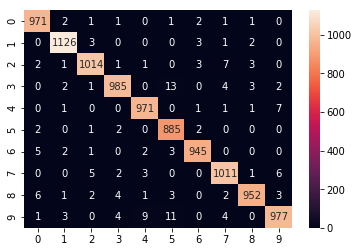

In [49]:
sns.heatmap(cm,annot=True,fmt='g')

In [51]:
accuracy_score(y_test,y_pred)*100

98.37